# Machine Learning Case Study - Letter Recognition Detection

<img src="" align='center' height="150" width="600"><br/>

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)
    - 3.1. [Importing Auto Insurance Claims Dataset](#section301)<br>
    - 3.2. [Description of the Dataset](#section302)<br>
    - 3.3. [Pandas Profiling before Data Preprocessing](#section303)<br>
4. [Data visualization and pre-processing](#section4)<br>
    - 4.1 [Data Preprocessing](#section401)<br>
       - 4.1.1. [Treat Property_damage Column](#section40101)<br>
       - 4.1.2. [Treat Police_report_available Column](#section40102)<br>
       - 4.1.3. [Treat Collision_type Column](#section40103)<br>
       - 4.1.4. [Find Correlated Columns](#section40104)<br>
       - 4.1.5. [Study the catagorical columns](#section40105)<br>
       - 4.1.6. [Age vs Months as Customer](#section40106)<br>
       - 4.1.7. [Pre-processing:  Feature selection/extraction](#section40107)<br>
       - 4.1.8. [Convert Categorical features to numerical values](#section40108)<br>
5. [Modeling](#section5)<br>
    - 5.1 [Define X and Y for Model Training](#section501)<br>
    - 5.2 [Train Test Split](#section502)<br>
    - 5.3 [Transformation/Scaling Train and Test Data](#section503)<br>
    - 5.4 [Logistic Regression Model](#section504)<br>
        - 5.4.1 [Logistic Regression - Model Evaluation](#section50401)<br>
    - 5.5 [Decision Tree](#section505)
        - 5.5.1 [Decision Tree - Model Evaluation](#section50501)
    -  5.6 [Decision Tree with Grid Search](#section506)
        - 5.6.1 [Decison Tree with Grid Search - Model Evaluation](#section50601)
    - 5.7 [Random Forest](#section507)
        - 5.7.1 [Random Forest - Model Evaluation](#section50701)
    - 5.8 [Random forest with Randomized Search CV](#section508)
        - 5.8.1 [Random forest with Randomized Search CV- Model Evaluation](#section50801)
6. [Model Evaluation Report](#section6)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>
## 1. Problem Statement


The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. See the article cited above for more details.



We will cover the following steps to illustrate how we build a Machine Learning Pipeline:

- Data Import
- Data Exploration
- Data Processing
- Feature Extraction
- GridsearchCV for Model Designing
- Measuring Error Rate
- Model Tuning using PCA
- Choose the Best Model

<a id=section2></a>
## 2. Importing Packages

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import time


<a id=section3></a>
## 3. Loading Data

Data is collected from below site.

https://www.kaggle.com/buntyshah/auto-insurance-claims-data


<a id=section301></a>
### 3.1 Importing Letter Recognition Dataset

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv',)

<a id=section302></a>
### 3.2 Description of the Dataset
**Attribute Information:**

1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)




In [91]:
df.describe(include = 'all')

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,NaN,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,NaN,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,NaN,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


> **Using ```describe``` & ```info``` we get following insight**
> - There **16000** rows in this dataset with 18 Columns out of which 17 Columns are numeric and 1 column which is taget variable is Categorical.
> - **id** is unique Id and can be dropped for Machine learning models
> - There are no null values in the columns

In [93]:
df.shape

(16000, 18)

In [94]:
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


<a id=section303></a>
### 3.3 Pandas Profiling before Data Preprocessing

In [95]:
import pandas_profiling 
profile = df.profile_report(title="Letter Recognition Dataset")
profile.to_file(output_file="Letter Recognition Dataset_profiling_before_preprocessing.html")

> From pandas Profile below are the analysis
 > - high has 281 (1.8%) zeros	Zeros
 > - onpix has 654 (4.1%) zeros	Zeros
 > - x-ege has 1965 (12.3%) zeros	Zeros
 > - x2bar has 352 (2.2%) zeros	Zeros
 > - y-box has 549 (3.4%) zeros	Zeros
 > - y-ege has 1996 (12.5%) zeros	Zeros
 > - y2bar has 219 (1.4%) zeros	
 


<a id=section4></a>
## 4. Data visualization and pre-processing
 
<a id=section401></a>
### 4.1 Data Preprocessing
 > - Drop Id column as it has no significance for our model 
 > - There are 26 unique letter in the target column. Hence we need to see do we have enough samples for each letter so that our prediction works well on balanced data set

In [96]:
df_letter = df.groupby(df['letter'])

In [97]:
df.drop(['id'], axis='columns', inplace=True)

In [98]:
df_letter.count()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
letter,,,,,,,,,,,,,,,,
A,633,633,633,633,633,633,633,633,633,633,633,633,633,633,633,633
B,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630
C,594,594,594,594,594,594,594,594,594,594,594,594,594,594,594,594
D,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638
E,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616
F,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622
G,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
H,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583
I,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590


>  **For Each letter we have enough sample. it means data is balanced**

<a id=section40101></a>
### 4.1.1 Check Correlation using Heat Map

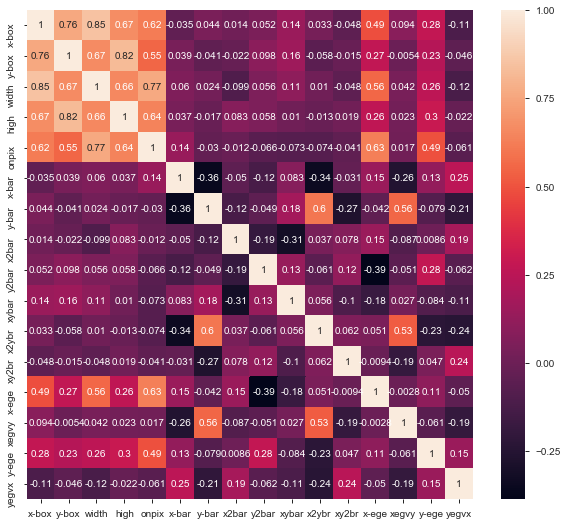

In [99]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True)

> From the above Heat map We can see that there is some -ve correleation for Xbox, Width, Y bar,x2ybar, xegvy but as per our use case it is obvisious to have these correlation. Let's build our model with an assumption that the correlation is needed and see how our model performs. later on we can use PCA to eliminate the dimensions and see if we can increase our model efficiency

<a id=section5></a>
# 5. Modeling

<a id=section501></a>
## 5.1 Define X and Y for Model Training

In [100]:
X = df.loc[:,df.columns != 'letter'] 

In [101]:
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [102]:
Y = df['letter']

In [103]:
Y.head()

0    I
1    D
2    N
3    G
4    S
Name: letter, dtype: object

<a id=section502></a>
## 5.2 Train Test Split

In [104]:
X_train,X_Test,Y_Train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 1)

In [105]:
print(X_train.shape)

(9600, 16)


In [106]:
print(Y_Train.shape)

(9600,)


In [107]:
print(X_Test.shape)

(6400, 16)


In [108]:
print(Y_test.shape)

(6400,)


<a id=section503></a>
## 5.3 Transformation/Scaling Train and Test Data

In [109]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_Test = StandardScaler().fit(X_Test).transform(X_Test)

<a id=section504></a>
## 5.4 MODELING USING GRIDSEARCHCV

In [110]:
## Define the Model Parameters dictory for all the models used for GRIDSearchCV. 
#This can help us run the multiple model with multiple parameters in a single iteration
model_params = {
    'Naive Bayes':{
            'model':GaussianNB(),
            'params' : { }
                },
    'SVC': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params':{'metric':['manhattan','chebyshev', 'euclidean'],'weights':['uniform', 'distance'],
                             'n_neighbors': range(1,20) }
        
        
    }
}

In [68]:
scores = []
# Run the model model parameters defined in the above step. 
#This will run all the model using different parameters and return accuracy
for model_name, mp in model_params.items():
    print(model_name,mp)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, refit=True)
    clf.fit(X_train,Y_Train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


Naive Bayes {'model': GaussianNB(priors=None, var_smoothing=1e-09), 'params': {}}
SVC {'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'params': {'C': [1, 10, 20, 30, 40], 'kernel': ['rbf', 'linear']}}
random_forest {'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'params': {'n_estimators': [1, 5, 10, 20, 30]}}
KNN {'model': KNeighborsClassifier(alg

In [82]:
df_Score = pd.DataFrame(scores,columns=['model','best_score','best_params']) # store the results in a Data frame
df_Score # print the score data frame to see the results of all the models

,model,best_score,best_params
0,Naive Bayes,0.644271,{}
1,SVC,0.948646,"{'C': 30, 'kernel': 'rbf'}"
2,random_forest,0.924063,{'n_estimators': 30}
3,KNN,0.917813,"{'metric': 'manhattan', 'n_neighbors': 8, 'wei..."


> From the above Gridsearch result we can see that best estimator is SVC which is giving us almost 95% accuracy hence let's use the SVC for our model and see how it performs on our test data based on the Best params and choose the right C value

<a id=section502></a>
## 5.2 SVC MODEL

In [71]:
# Hyper parameter Tunning

c =[1,10,15,20,30,40]  ## run SVC with different C values
score = []
start_time = time.time() # track the time required to run the alogithm
for i in c:
    model = SVC(gamma='auto', C= i, kernel = 'rbf')
    model.fit(X_train,Y_Train)
    ypred = model.predict(X_Test)
    Model_score = accuracy_score(Y_test, ypred)
    model_precision = precision_score(Y_test, ypred, average='weighted')
    # store C and its corresponding Score value in the model
    score.append({
        'C': i,
        'score': Model_score,
        'Precision' : model_precision
    })
end_time = time.time()
time2 = end_time-start_time
print(time2)  
    

30.975156545639038


<a id=section50202></a>
## 5.2.2 Choose Best C for SVC MODEL
> We have already ran the SVC algorithm for C = [1,10,15,20,30,40]. Now let's choose the **Best C** value to avoid Overfitting and underfitting

In [72]:
score

[{'C': 1, 'score': 0.92390625, 'Precision': 0.926703993097344},
 {'C': 10, 'score': 0.9578125, 'Precision': 0.9582890522482939},
 {'C': 15, 'score': 0.95734375, 'Precision': 0.9577416116541019},
 {'C': 20, 'score': 0.95703125, 'Precision': 0.9573725026316116},
 {'C': 30, 'score': 0.95796875, 'Precision': 0.9583144167475175},
 {'C': 40, 'score': 0.95734375, 'Precision': 0.9576910054892902}]

In [73]:
model

SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[{'C': 1, 'score': 0.9315625},
 {'C': 10, 'score': 0.9646875},
 {'C': 20, 'score': 0.96578125},
 {'C': 30, 'score': 0.96578125},
 {'C': 40, 'score': 0.96578125}]

In [84]:
df_score= pd.DataFrame(score,columns =['C', 'score'])

In [85]:
df_score

,C,score
0,1,0.923906
1,10,0.957812
2,15,0.957344
3,20,0.957031
4,30,0.957969
5,40,0.957344


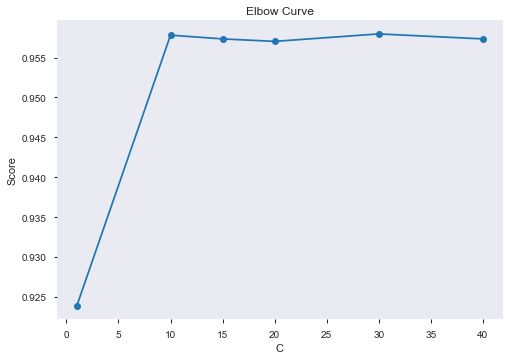

In [86]:
import pylab as pl
pl.plot((df_score.C),df.score,marker='o')
pl.grid()
pl.xlabel('C')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

> from the above Elbow Curve we can clearly see that with **C= 10 we get a good accuracy** and as C increases there is hardly any change in the accuracy score. Let choose C= 10 and build our final model on the Test Data

## PCA

In [111]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X)

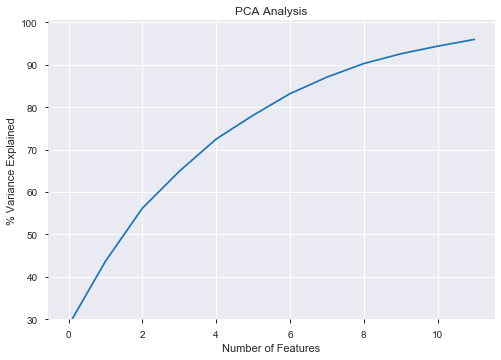

In [112]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [113]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

12 components explain 95% of the variation in data


In [114]:
pca = PCA(n_components=12, random_state = 0)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

(16000, 12)


# Run the Same Algorithm on PCA Data

In [116]:
from sklearn.model_selection import train_test_split
X_PCAtrain, X_PCAtest, y_PCAtrain, y_PCAtest = train_test_split(X, Y, test_size=0.25, random_state=1)

In [ ]:
scores = []

for model_name, mp in model_params.items():
    print(model_name,mp)
    PCAclf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    PCAclf.fit(X_PCAtrain,y_PCAtrain)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_PCAScore = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_PCAScore

In [117]:
c =[1,10,15,20,30,40]
scorePCA = []
#start_time = time.time()
#end_time = time.time()
#time2 = end_time-start_time
#print(time2)
PCAstart_time = time.time()
for i in c:
    PCASVC_model = SVC(gamma='auto', C= i, kernel = 'rbf')
    PCASVC_model.fit(X_PCAtrain,y_PCAtrain)
    ypredPCA = PCASVC_model.predict(X_PCAtest)
    Model_score = accuracy_score(y_PCAtest, ypredPCA)
    model_precision = precision_score(y_PCAtest, ypredPCA, average='weighted')
    scorePCA.append({
        'C': i,
        'score': Model_score,
        'Precision' : model_precision
    })
PCAend_time = time.time()
PCAtime2 = PCAend_time-PCAstart_time
print("Time required to run SVC using PCA",PCAtime2)
    

In [119]:
scorePCA

[{'C': 1, 'score': 0.956, 'Precision': 0.9569485499027288},
 {'C': 10, 'score': 0.963, 'Precision': 0.9633441249171063},
 {'C': 15, 'score': 0.963, 'Precision': 0.9633448569621682},
 {'C': 20, 'score': 0.963, 'Precision': 0.9633448569621682},
 {'C': 30, 'score': 0.96275, 'Precision': 0.9631207256447677},
 {'C': 40, 'score': 0.96275, 'Precision': 0.9631207256447677}]

In [118]:
print("Time required to run SVC using PCA",PCAtime2)

Time required to run SVC using PCA 50.96321129798889


## Run the Model on Test Data
> Run the model on the remaining 4000 records which was not used in the training model initially and compare the results with the actual results vs predicted results to measure the accurancy of our model

In [129]:
df_Test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')
df_Actual = pd.read_csv('letter-recog.csv') ## this s actual data set from the UCI set which contains all the 20000 rows

In [144]:
Y_actual = df_Actual.iloc[16001:,0:1] 
# Choose the last 4000 rows for a our actual Y value to compare our model results on UCI Data set

In [145]:
df_Test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


In [146]:
df_Test.drop(['id'], axis='columns', inplace=True) # Drop Id columns

In [147]:
X_Test_1 = StandardScaler().fit(df_Test).transform(df_Test) # do scalling on the test data

In [150]:
start_time = time.time() # track the time required to run the alogithm

# initialize the model based on the best parameter which have selected for SVC model

finalmodel = SVC(gamma='auto', C= 10, kernel = 'rbf')
finalmodel.fit(X_train,Y_Train)

Y_Test_pred = finalmodel.predict(X_Test_1)

Model_score = accuracy_score(Y_actual, Y_Test_pred)
model_precision = precision_score(Y_actual, Y_Test_pred, average='weighted')

print("Model_score", Model_score)
print("model_precision",model_precision)

end_time = time.time()
time2 = end_time-start_time
print('timre required to predict 4000 rows',time2)  

Model_score 0.959739934983746
model_precision 0.960410582896551
2.4299111366271973


In [162]:
np.array(Y_actual.head(50)).reshape(1,50) # see the Actual value of Y

array([['N', 'V', 'I', 'N', 'H', 'E', 'Y', 'G', 'E', 'N', 'B', 'G', 'L',
        'E', 'G', 'M', 'D', 'Y', 'R', 'P', 'D', 'E', 'W', 'D', 'Q', 'R',
        'G', 'Y', 'R', 'D', 'J', 'C', 'I', 'T', 'C', 'N', 'M', 'B', 'H',
        'R', 'Q', 'A', 'G', 'Q', 'H', 'K', 'G', 'A', 'A', 'J']],
      dtype=object)

In [161]:
Y_Test_pred[0:50] 
# see the predicted output and compare the results with Actual. We can see that almost 96% accurate results

array(['N', 'V', 'I', 'N', 'H', 'E', 'Y', 'C', 'E', 'N', 'B', 'G', 'L',
       'E', 'W', 'M', 'D', 'Y', 'R', 'P', 'D', 'E', 'W', 'D', 'Q', 'R',
       'G', 'Y', 'K', 'D', 'J', 'C', 'I', 'T', 'C', 'N', 'M', 'B', 'H',
       'R', 'Q', 'A', 'G', 'Q', 'H', 'K', 'G', 'A', 'A', 'J'],
      dtype=object)